Exploratry Data Analysis

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from  datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_data'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)



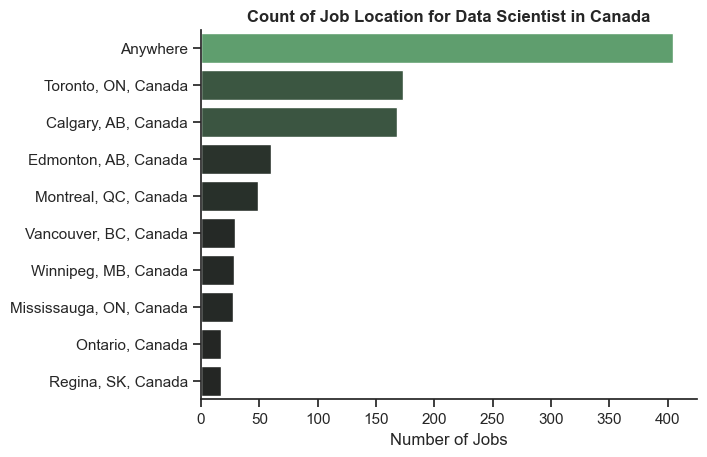

In [88]:
df_DS_CA = df[(df['job_country'] == 'Canada') & (df['job_title_short'] == 'Data Scientist')]
df_plot = df_DS_CA['job_location'].value_counts().iloc[1:11].to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data= df_plot, x= 'count', y= 'job_location', hue= 'count', palette= 'dark:g', legend= False)
sns.despine()
plt.title('Count of Job Location for Data Scientist in Canada', fontweight = 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



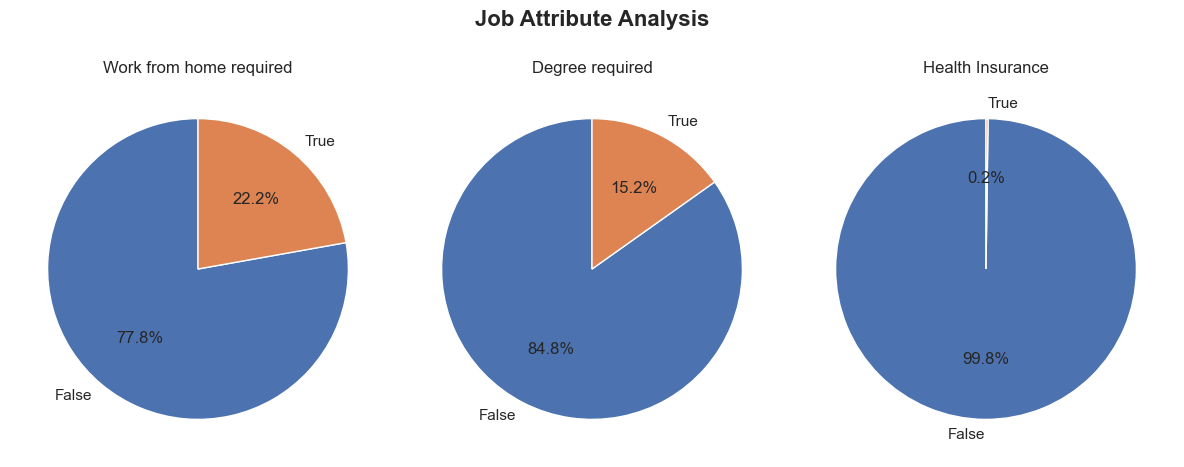

In [79]:
df_pie_list = ['job_work_from_home', 'job_no_degree_mention','job_health_insurance']
df_pie = df_DS_CA[df_pie_list]
df_pie_dict = {'job_work_from_home': 'Work from home required', 
               'job_no_degree_mention': 'Degree required',
               'job_health_insurance': 'Health Insurance'
                 }


fix, ax = plt.subplots(1,3)
fix.set_size_inches(12, 5)



for i, (column, Title) in enumerate(df_pie_dict.items()):
    ax[i].pie(df_pie[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False','True'])
    ax[i].set_title(Title)
    
  
fix.suptitle("Job Attribute Analysis", fontsize=16, fontweight='bold')
fix.tight_layout()

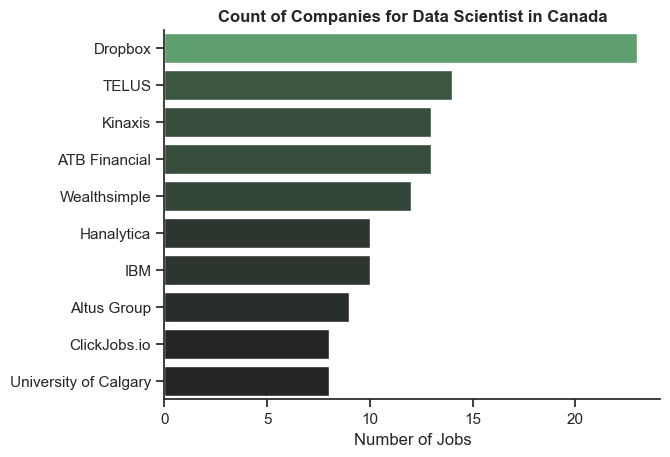

In [89]:
df_plot_cn = df_DS_CA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data= df_plot_cn, x = 'count', y = 'company_name', hue = 'count', palette= 'dark:g', legend= False)
sns.despine()
plt.title('Count of Companies for Data Scientist in Canada', fontweight ='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


Text(0, 0.5, 'Number of Jobs')

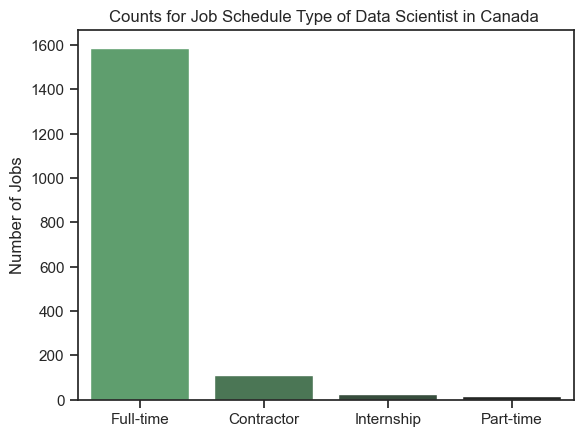

In [112]:
df_plot_jst = df_DS_CA['job_schedule_type'].value_counts().head(4).to_frame()
df_plot_jst

ax = plt.gca()
sns.set_theme(style = 'ticks')
sns.barplot(data= df_plot_jst, x ='job_schedule_type', y = 'count', hue = 'job_schedule_type', palette= 'dark:g_r')
plt.title('Counts for Job Schedule Type of Data Scientist in Canada ')
plt.xlabel('')
plt.ylabel('Number of Jobs')